In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings=pd.read_csv("ratings.csv")
movies=pd.read_csv("movies.csv")


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
n_ratings=len(ratings)
n_movies=ratings['movieId'].nunique()
n_users=ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


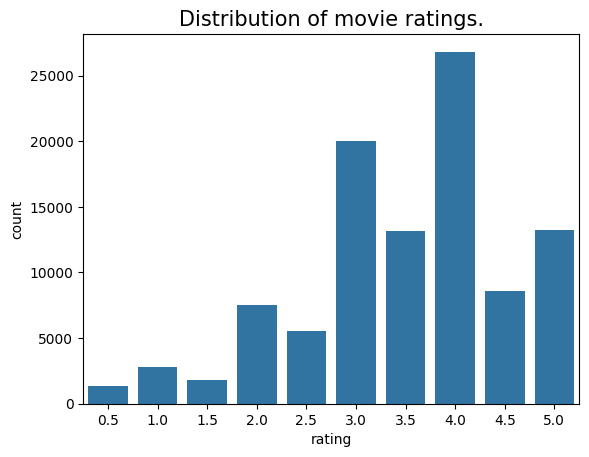

In [6]:
sns.countplot(x='rating',data=ratings)
plt.title("Distribution of movie ratings.",fontsize=15)
plt.show()

In [7]:
print(f"The mean global rating: {round(ratings['rating'].mean(),2)}.")
mean_rating=ratings.groupby('userId')['rating'].mean()
print(f"The mean rating per user : {round(mean_rating.mean(),2)}.")

The mean global rating: 3.5.
The mean rating per user : 3.66.


In [8]:
ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [9]:
movies_ratings=ratings.merge(movies,on='movieId')
movies_ratings['title'].value_counts()[0:10]


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [10]:
mean_rating=ratings.groupby('movieId')[['rating']].mean()
lowest_rate=mean_rating['rating'].idxmin()
movies[movies['movieId']==lowest_rate]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [11]:
highest_rate=mean_rating['rating'].idxmax()
movies[movies['movieId']==highest_rate]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


In [12]:

#________________________________________________Bayesian Average________________________________________________

movies_stats=ratings.groupby('movieId')['rating'].agg(['count','mean'])
C=movies_stats['count'].mean()
m=movies_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg=(C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg,3)

lamerica=pd.Series([5,5])
bayesian_avg(lamerica)


Average number of ratings for a given movie: 10.37
Average rating for a given movie: 3.26


3.543

In [13]:
bayesian_avg_ratings=ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns=['movieId','bayesian_avg']
bayesian_avg_ratings

,movieId,bayesian_avg
0,1,3.891
1,2,3.417
2,3,3.260
3,4,2.898
4,5,3.105
...,...,...
9719,193581,3.327
9720,193583,3.283
9721,193585,3.283
9722,193587,3.283


In [14]:
movies_stats=movies_stats.merge(bayesian_avg_ratings, on='movieId')
movies_stats = movies_stats.merge(movies[['movieId', 'title']])


In [15]:
movies_stats.sort_values(by='bayesian_avg',ascending=False)[:5]


,movieId,count,mean,bayesian_avg,title
277,318,317,4.429022,4.392,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227,Fight Club (1999)
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"


In [16]:
movies['genres']=movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
# How many genres are there

from collections import Counter
genre_frequency=Counter(g for genres in movies['genres'] for g in genres)
print(f"There are: {len(genre_frequency)} genres.")
genre_frequency

There are: 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [18]:
#Most common genres

print(f"The Most common genres are: \n{genre_frequency.most_common(5)}")

The Most common genres are: 
[('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


C:\Users\deep\AppData\Local\Temp\ipykernel_9648\335989853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre',y='count',data=genre_frequency_df.sort_values(by='count',ascending=False),palette='magma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Children'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'IMAX'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

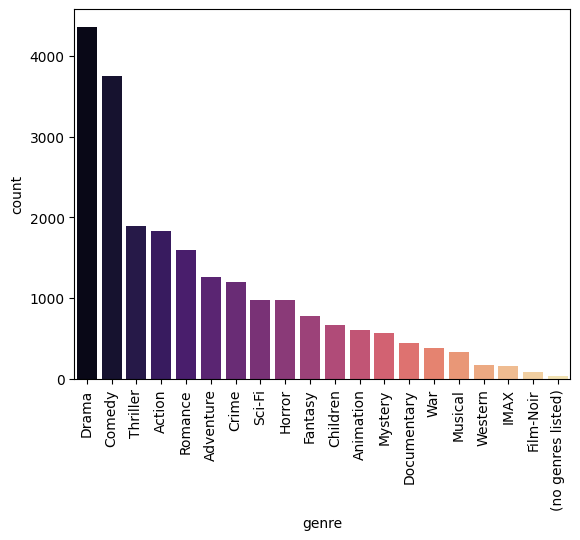

In [19]:
genre_frequency_df=pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns=['genre','count']
genre_frequency_df
sns.barplot(x='genre',y='count',data=genre_frequency_df.sort_values(by='count',ascending=False),palette='magma')
plt.xticks(rotation=90)

In [20]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """

    N = df['movieId'].nunique()
    M = df['userId'].nunique()
    

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper



X,user_mapper,movie_mapper,user_inv_mapper,movie_inv_mapper=create_X(ratings)

In [21]:
X.shape

(610, 9724)

In [22]:
user_mapper

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [23]:
#Evaluate Sparsity
#Sparsity is the ratio of filled cells to total cells

n_total=X.shape[0]*X.shape[1]
n_ratings=X.nnz #non zero items
sparsity=n_ratings/n_total
print(f"Matrix Sparsity: {round(sparsity*100,2)}")

Matrix Sparsity: 1.7


In [24]:
n_ratings_per_user=X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [25]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [26]:
n_ratings_per_movie=X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [27]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


C:\Users\deep\AppData\Local\Temp\ipykernel_9648\3364525973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
C:\Users\deep\AppData\Local\Temp\ipykernel_9648\3364525973.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


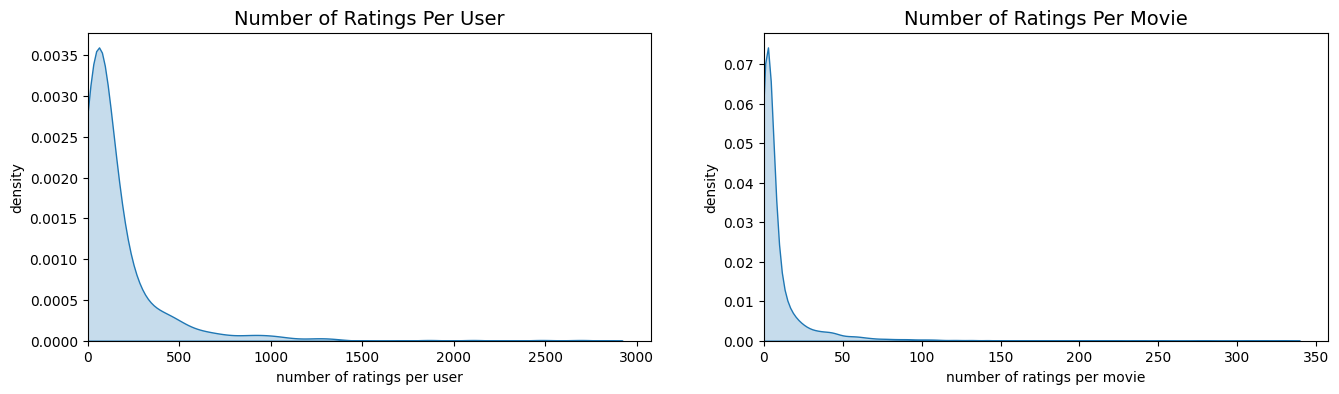

In [28]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [29]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [30]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

In [31]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_titles

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [32]:
movie_id = 2959

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)   # Can use manhattan or euclidean distance for KNN
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}, you might also like:\n")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Fight Club (1999), you might also like:

Matrix, The (1999)
Memento (2000)
American History X (1998)
Kill Bill: Vol. 1 (2003)
Lord of the Rings: The Fellowship of the Ring, The (2001)
American Beauty (1999)
Pulp Fiction (1994)
Lord of the Rings: The Return of the King, The (2003)
Inception (2010)


In [33]:

#https://www.youtube.com/watch?v=XfAe-HLysOM

#Handling the Cold Start Problem ( Sol: We use Content Based Filtering )
# We use genre

n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")



There are 9742 unique movies in our movies dataset.


In [34]:
genres=set(g for G in movies['genres'] for g in G)
for g in genres:
    movies[g]=movies.genres.transform(lambda x: int(g in x))

movie_genres=movies.drop(columns=['movieId','title','genres'])
movie_genres.head()

,Fantasy,Comedy,(no genres listed),Musical,Crime,Thriller,War,Action,Drama,Romance,IMAX,Animation,Horror,Children,Sci-Fi,Film-Noir,Adventure,Documentary,Western,Mystery
0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

cosine_sim

Dimensions of our genres cosine similarity matrix: (9742, 9742)


array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [36]:
#Creating a movie finder function

from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

C:\Users\deep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [45]:
title = movie_finder('Fight Club')
title

'Fight Club (1999)'

In [46]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for {title} is: {idx}")

Movie index for Fight Club (1999) is: 2226


In [47]:
#Now let us get n recommendations

n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores=sim_scores[1:(n_recommendations+1)]
sim_scores

[(254, 1.0),
 (307, 1.0),
 (758, 1.0),
 (919, 1.0),
 (1181, 1.0),
 (1192, 1.0),
 (1915, 1.0),
 (2165, 1.0),
 (2226, 1.0),
 (2443, 1.0)]

In [40]:
similar_movies=[i[0] for i in sim_scores]
similar_movies

print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Boys of St. Vincent, The (1992):


25                       Othello (1995)
30               Dangerous Minds (1995)
36      Cry, the Beloved Country (1995)
39                   Restoration (1995)
50                       Georgia (1995)
51         Home for the Holidays (1995)
55            Mr. Holland's Opus (1995)
105     Boys of St. Vincent, The (1992)
120      Basketball Diaries, The (1995)
121    Awfully Big Adventure, An (1995)
Name: title, dtype: object

In [41]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

get_content_based_recommendations('toy story', 5)

Because you watched Toy Story (1995):
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object


In [42]:
#Dimensionality Reduction with Matrix Factorization (advanced)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)   #n_components=Hyperparameters
Q = svd.fit_transform(X.T)
Q.shape

(9724, 20)

In [43]:
Q.T

array([[ 3.76498276e+01,  2.05961933e+01,  8.50418215e+00, ...,
         3.45682068e-02,  3.45682068e-02,  1.45217546e-01],
       [-6.38009441e+00, -4.77879877e-01, -5.71492394e+00, ...,
         1.38183818e-01,  1.38183818e-01,  2.94216678e-01],
       [ 1.49946172e+01,  1.08659162e+01,  3.44169343e+00, ...,
        -1.66510356e-02, -1.66510356e-02,  2.34797016e-02],
       ...,
       [-1.15445886e+00,  5.54668717e-01, -9.85637601e-01, ...,
         4.48576549e-03,  4.48576549e-03,  8.28052340e-02],
       [-2.31155847e+00,  1.42788956e+00, -1.50382415e+00, ...,
        -1.34345020e-03, -1.34345020e-03,  2.99688299e-02],
       [-7.86450991e-01,  2.47058455e-01, -2.98822358e+00, ...,
         9.20132963e-03,  9.20132963e-03, -1.37692611e-01]])

In [44]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Home Alone (1990)
Jurassic Park (1993)
Aladdin (1992)
Willy Wonka & the Chocolate Factory (1971)
Back to the Future (1985)
Groundhog Day (1993)
Forrest Gump (1994)
Star Wars: Episode IV - A New Hope (1977)
Princess Bride, The (1987)
